# Проработка вариантов решения

Задачи на текущий этап:
* Проанализировать имеющиеся решения
* Обозначить основные плюсы и минусы каждого из потенциальных решений
* Выбрать подходящее решение (алгоритм или набор алгоритмов) для данной задачи и обосновать его

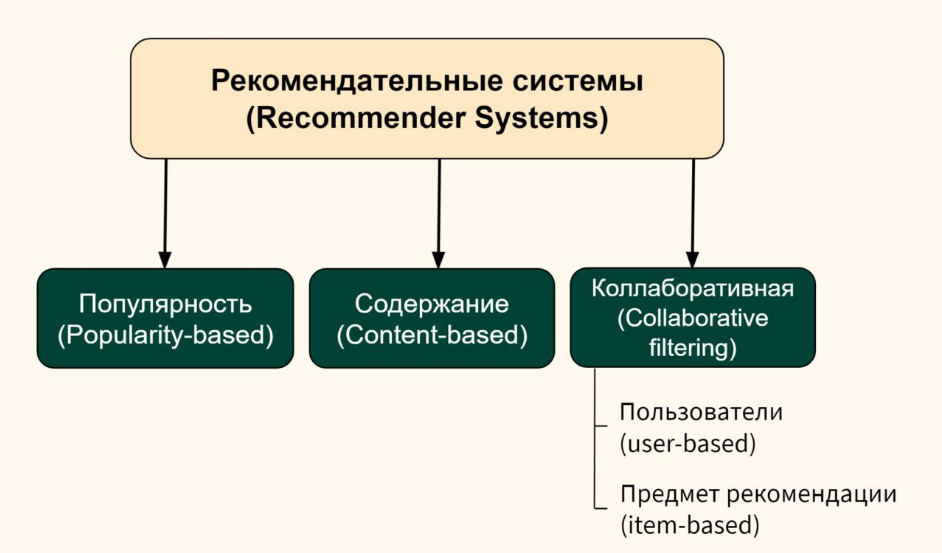

# implicit knn (k Nearest Neighbours)

Следующий алгоритм коллаборативной фильтрации, основанный на предмете рекомендации - классический подбор соседей и реализован в библиотеке implicit. Работаем с разреженными матрицами, соответственно требуется предварительно сформировать разреженную матрицу c помощью scipy.sparse. 

Суть алгоритма: ищем в матрице по методу ближайших соседей айтемы, максимально похожие на айтемы из истории взаимодействий юзера, и рекомендуем ему их. Гиперпараметр один - К, число соседей. В implicit доступна модель CosineRecommender, она item-ориентирована, для поиска схожести между векторами товаров используется косинусное расстояние. Также реализация knn есть в sklearn.

Плюсы:
* Проработка комплементарных товаров
* Простая реализация
* Удобная и быстрая подготовка данных

Минусы:
* Требует много памяти, поскольку хранит большую часть или все данные
* Большие наборы данных приведут к задержкам по времени в работе алгоритма
* Склонен к переобучению


# implicit iALS

Alternating least squares - это эвристический приближенный алгоритм для разложения матриц. На выходе снова получаем эмбеддинги юзеров и айтемов, с помощью которых делаем рекомендации.

Процесс оптимизации функции потерь будет иметь следующий вид.

В цикле до сходимости:

Фиксируем матрицу X(скрытые представления пользователей);

Решаем задачу L2-регуляризованной регрессии для каждого товара и находим оптимальную матрицу Y;

Фиксируем матрицу Y (скрытые представления объектов);

Решаем задачу L2-регуляризованной регрессии для каждого пользователя и находим оптимальную матрицу X;

Решение, получаемое путём попеременного вычисления точных аналитических решений, обычно точнее тех, что получаются с помощью наивного градиентного спуска. Более того, данное решение имеет эффективную реализацию, позволяющую использовать преимущества параллельных вычислений.

Явный фидбэк (оценки) пользователей доступен нам не всегда — и не всегда ему можно верить. Неявный фидбэк (количества просмотров/прослушиваний, покупок, добавлений в закладки) есть всегда и в гораздо большем количестве, а количество для машинного обучения критично.

Неявным фидбеком является в том числе и факт взаимодействия, поэтому мы можем заполнить всю матрицу user-item целиком: на тех позициях, где пользователь положительно взаимодействовал с объектом, поставим 1 а на тех, где взаимодействие было негативым или его вообще не произошло, поставим 0. Эта компонента фидбека называется предпочтением (preference):

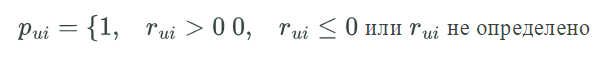

Введём ещё степень уверенности (confidence), отражающую уверенность в оценке пользователя:

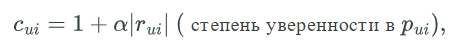

Тогда функция потерь будет иметь следующий вид:

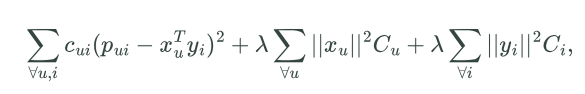


Она позволяет:

* Учитывать неявный фидбек, которого обычно на порядок больше, чем явного,
* Регулировать степень уверенности в действиях пользователей.

Плюсы:
* Эффективность при работе с разреженными данными
* Простота реализации и настройки
* Способность учитывать неявные взаимодействия

Минусы:
* Неустойчивость к выбору гиперпараметров: выбор оптимальных значений гиперпараметров в алгоритме implicit ALS может быть нетривиальной задачей и требует тщательного подбора.
* Требовательность к объему данных
* Ограничения на обработку контента: implicit ALS ориентирован на работу с данными о взаимодействиях пользователей, что ограничивает его способность учитывать контентные характеристики товаров при формировании рекомендаций.

# SLIM - Sparse Linear Methods

Sparse Linear Methods

Описанные выше методы демонстрируют хорошее качество, однако требуют больших усилий для эффективной работы в онлайн сервисах. Возникает потребность в лёгких моделях, эффективность которых значительно выше, но качество которых не сильно хуже. Для этого была предложена линейная разреженная модель.

Принцип работы SLIM:

1. Изначально строится матрица схожести пользователей или товаров на основе их взаимодействий.

2. Применяется регуляризация для уменьшения переобучения и улучшения обобщающей способности модели.

3. Минимизируется функционал ошибки, который включает в себя как ошибку предсказания, так и регуляризационный штраф.

4. На основе обученной модели строятся рекомендации для пользователей.

В функции потерь (например MSE) используется L1 регуляризация:

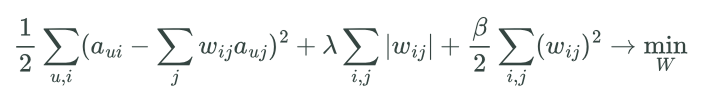

Матрицы получаются разреженными -> Эти обстоятельства позволяют заметно улучшить эффективность применения модели.

Плюсы:

* Эффективность при работе с разреженными данными: SLIM хорошо справляется с задачами рекомендаций в случаях, когда данные о взаимодействиях пользователей с товарами представлены в виде разреженной матрицы.

* Устойчивость к переобучению: использование регуляризации позволяет уменьшить переобучение модели и повысить её обобщающую способность.

* Гибкость и настраиваемость: SLIM позволяет настраивать различные параметры модели для достижения оптимальных результатов.

Минусы:

* Вычислительная сложность: SLIM может быть вычислительно затратным алгоритмом, особенно при работе с большими объемами данных.

* Необходимость в большом объеме данных: для эффективной работы SLIM требуется большое количество данных о взаимодействиях пользователей с товарами.

* Ограничения на обработку контента: SLIM ориентирован на работу с данными о взаимодействиях пользователей, что ограничивает его способность учитывать контентные характеристики товаров при формировании рекомендаций.





# Двухэтапная архитектура

Двухэтапная архитектура в рекомендательных системах представляет собой подход, при котором процесс формирования рекомендаций разбивается на два этапа: первый этап - грубая фильтрация (pre-filtering), второй этап - точная рекомендация (post-filtering). 

1. Грубая фильтрация (pre-filtering):
На этом этапе используются быстрые и простые алгоритмы для быстрого и грубого отбора кандидатов на основе общих характеристик или популярности. Например, можно использовать популярные товары или товары, которые похожи на те, которые пользователь уже просматривал.

Примеры алгоритмов для грубой фильтрации: популярные товары, коллаборативная фильтрация на основе соседей (например, User-Based CF или Item-Based CF).

Плюсы грубой фильтрации:
* Быстрота и эффективность: позволяет быстро сузить круг рекомендаций и уменьшить нагрузку на более сложные алгоритмы.
* Простота: не требует сложных вычислений или большого объема данных.

Минусы грубой фильтрации:
* Возможная низкая точность: из-за обобщенности и ограниченности критериев выбора кандидатов может быть низкая точность рекомендаций.

2. Точная рекомендация (post-filtering):
На этом этапе используются более сложные и точные алгоритмы для уточнения списка кандидатов, полученных на первом этапе. Эти алгоритмы могут учитывать более индивидуальные предпочтения пользователя, контентные характеристики товаров и другие дополнительные данные.

Примеры алгоритмов для точной рекомендации: коллаборативная фильтрация с использованием матричных разложений (например, SVD, ALS), содержательные методы (content-based filtering), гибридные методы.

Плюсы точной рекомендации:
* Высокая точность: более сложные алгоритмы могут учитывать более широкий спектр данных и предпочтений пользователей.
* Персонализация: возможность учитывать индивидуальные предпочтения пользователей.

Минусы точной рекомендации:
* Вычислительная сложность: более сложные алгоритмы могут требовать больше времени и ресурсов для обработки данных.
* Необходимость в большем объеме данных: для точной рекомендации часто требуется больше данных о пользователях и товарах.

Пример двухэтапной архитектуры в рекомендательной системе:
На первом этапе можно использовать популярные товары или товары, похожие на те, что пользователь уже просматривал. На втором этапе можно применить коллаборативную фильтрацию с использованием матричного разложения для уточнения и персонализации рекомендаций.

Двухэтапная архитектура позволяет достичь баланса между скоростью работы и точностью рекомендаций в рекомендательных системах. Популярной связкой алгоритмов является LightFM + Catboost.


# Sequence-based

Sequence-based нейросетевой подход для рекомендательных систем обычно основан на рекуррентных нейронных сетях (RNN), таких как LSTM (Long Short-Term Memory) или GRU (Gated Recurrent Unit). Структура сети:

1. Эмбеддинги элементов: Каждый элемент последовательности представляется в виде векторного эмбеддинга. 

2. LSTM слои: LSTM является типом рекуррентной нейронной сети, способной учитывать долгосрочные зависимости в последовательности. Модель на основе LSTM состоит из нескольких слоев LSTM, каждый из которых имеет входной вектор (эмбеддинг элемента) и выходной вектор.

3. Последовательное предсказание: На первом шаге модель принимает начальную последовательность элементов и проходит через слои LSTM. Выходной вектор последнего LSTM слоя передается в полносвязный слой, который предсказывает вероятности следующего элемента в последовательности.

4. Обучение модели: Для обучения модели используется метод обратного распространения ошибки (backpropagation). Модель минимизирует ошибку предсказания следующего элемента с помощью метода оптимизации, такого как стохастический градиентный спуск.

5. Предсказание: После обучения модель использоваться для предсказания следующего наилучшего элемента в последовательности для конкретного пользователя.

Этот подход позволяет модели учитывать порядок действий пользователя и предсказывать следующий элемент, основываясь на контексте и зависимостях между элементами последовательности. 

# Графовые модели 

Графовые нейронные сети (GNN) представляют собой класс алгоритмов машинного обучения, которые могут обрабатывать данные, представленные в форме графа. В контексте рекомендательных систем граф может представлять собой социальную сеть, где узлы — пользователи, а рёбра — связи между ними.

В отличие от традиционных нейронных сетей, которые обрабатывают данные последовательно, GNN могут обрабатывать данные одновременно на нескольких уровнях, используя информацию о структуре графа. Это позволяет им учитывать не только прямые взаимодействия между объектами, но и косвенные связи через общих соседей.

Требуется предварительная обработка в виде построения графа, где вершины - пользователи, ребра - товары. Подход помогает искать косвенные связи и комплементарные товары, посредством анализа связей между пользователями.



### Таблица с характеристикой каждого алгоритма

| Название алгоритма | Достоинства | Недостатки |
| --- | --- | --- |
| implicit knn | проработка комплементарных товаров, простая реализация, удобная и быстрая подготовка данных | требует много памяти, большие наборы данных приведут к задержкам по времени в работе алгоритма, склонен к переобучению |
| implicit iALS | эффективность при работе с разреженными данными, простота реализации и настройки, cпособность учитывать неявные взаимодействия, | неустойчивость к выбору гиперпараметров, требовательность к объему данных |
| SLIM | эффективность при работе с разреженными данными, устойчивость к переобучению, гибкость и настраиваемость | вычислительная сложность, необходимость в большом объеме данных, ограничения на обработку контента |
| Двухэтапная архитектура | улучшенная производительность, высокая точность рекомендаций | ограниченная персонализация на первом этапе, дополнительная сложность и затраты  |
| LSTM | учет последовательности, персонализация| вычислительная сложность, холодный старт |
| GNN | поиск косвенных связей | графовая предобработка |

Для себя я выбрал два алгоритма: это LSTM и двухэтапная архитектура, посколько первый алгоритм бывает достаточно эффективен на многих задачах, а второй показывает самую большую точность на основании исследований, мне бы хотелось провести исследование двух pipeline'ов, сравнить нейросетевой подход и классический, и выбрать лучший для текущей задачи. Для baseline можно взять implicit knn

## Ссылки на источники и статьи

https://arxiv.org/pdf/1905.06874.pdf - sequence-based подход на примере трансформера

https://new-disser.ru/_avtoreferats/01007994980.pdf - рекомендации на основе графовых моделей

https://habr.com/ru/companies/epam_systems/articles/526748/ - графовая модель

https://arxiv.org/pdf/1909.00385.pdf - SDM : Sequential Deep Matching Model как работает в рекомендациях

https://education.yandex.ru/handbook/ml/article/rekomendacii-na-osnove-matrichnyh-razlozhenij - рекомендации на основе матричных разложений

https://habr.com/ru/articles/773126/ - RecTools библиотека для рекомендательных систем